<a href="https://colab.research.google.com/github/manassanant132/Time_Series/blob/main/CNN%2BLSTM%26GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##DATA PREP

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM,GRU,Dense,Dropout

###TRAIN

<function matplotlib.pyplot.show(close=None, block=None)>

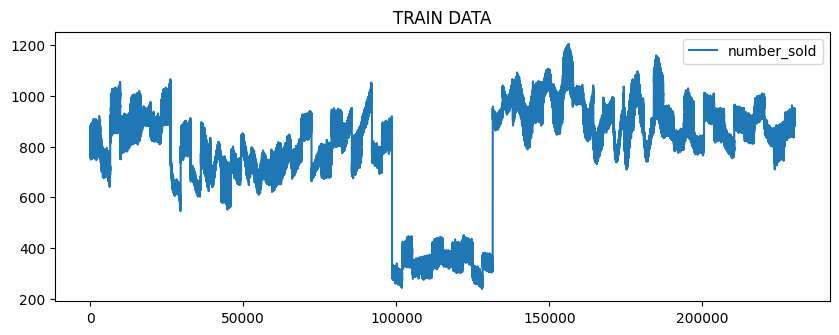

In [2]:
df = pd.read_csv('/content/train.csv',usecols=['number_sold'])
df.plot(figsize=(10,3.5),legend=True)
plt.title('TRAIN DATA')
plt.show

In [3]:
from sklearn.preprocessing import MinMaxScaler

data = df.values.reshape(-1,1)
sc=MinMaxScaler()
data_sc = sc.fit_transform(data)

In [4]:
def convertToMetrix(data,step=1):
  X,Y=[],[]
  for i in range(len(data)-step):
    d=i+step
    X.append(data[i:d,])
    Y.append(data[d,])
  return np.array(X),np.array(Y)

# n_train = 67

# train,test = data_sc[0:n_train],data_sc[n_train:]
# train.shape,test.shape

In [5]:
train = data_sc
train.shape

(230090, 1)

###TEST

<function matplotlib.pyplot.show(close=None, block=None)>

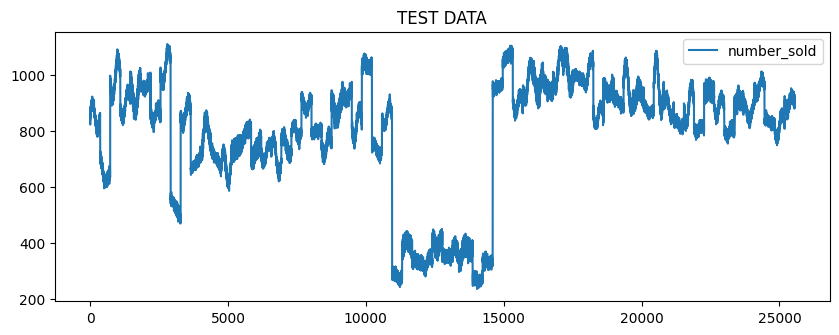

In [6]:
df1 = pd.read_csv('/content/test.csv',usecols=['number_sold'])
df1.plot(figsize=(10,3.5),legend=True)
plt.title('TEST DATA')
plt.show

In [7]:
data1 = df1.values.reshape(-1,1)
sc=MinMaxScaler()
data1_sc = sc.fit_transform(data1)

In [8]:
test = data1_sc
test.shape

(25550, 1)

###STEP

In [9]:
step = 500
X_train,y_train = convertToMetrix(train,step)
X_test,y_test = convertToMetrix(test,step)

print('X_Train,Test(after conversatiob):',X_train.shape,X_test.shape)
print('y_Train,Test(after conversatiob):',y_train.shape,y_test.shape)

X_Train,Test(after conversatiob): (229590, 500, 1) (25050, 500, 1)
y_Train,Test(after conversatiob): (229590, 1) (25050, 1)


-------------------

##No.1 : CNN+LSTM

In [10]:
import tensorflow as tf

In [15]:
model = tf.keras.Sequential()

# model.add(LSTM(units=120,return_sequences=False,input_shape=(step,1),activation='relu'))
# model.add(Dropout(0.2))

#1. CNN LAYER
model.add(tf.keras.layers.Conv1D(filters = 250, kernel_size = 5, padding = 'Same', input_shape=(step,1), name = 'conv1d1'))
model.add(tf.keras.layers.BatchNormalization(name = 'batch_norm1'))
model.add(tf.keras.layers.Activation("relu", name = 'relu1'))
model.add(tf.keras.layers.Dropout(0.3, name = 'dropout1'))

#1.1 LSTM

model.add(LSTM(units=50,return_sequences=True,input_shape=(step,1),activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(units=40,activation='relu',return_sequences=False))

# model.add(LSTM(units=40,return_sequences=False,activation='relu'))
# model.add(LSTM(units=120,return_sequences=True,input_shape=(step,1),activation='relu'))
# model.add(Dropout(0.2))
# model.add(LSTM(units=40,activation='relu'))

#FULLY CONNECTED LAYERq
model.add(tf.keras.layers.Flatten(name = 'flatten1'))
model.add(tf.keras.layers.Dense(256, name = 'dense1'))
model.add(tf.keras.layers.BatchNormalization(name = 'batch_norm5'))
model.add(tf.keras.layers.Activation("relu", name = 'relu5'))
model.add(tf.keras.layers.Dropout(0.30, name = 'dropout5'))

#OUTPUT LAYER
model.add(tf.keras.layers.Dense(1, name = 'dense2'))

#COMPILE
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d1 (Conv1D)            (None, 500, 250)          1500      
                                                                 
 batch_norm1 (BatchNormaliz  (None, 500, 250)          1000      
 ation)                                                          
                                                                 
 relu1 (Activation)          (None, 500, 250)          0         
                                                                 
 dropout1 (Dropout)          (None, 500, 250)          0         
                                                                 
 lstm_8 (LSTM)               (None, 500, 50)           60200     
                                                                 
 dropout_4 (Dropout)         (None, 500, 50)           0         
                                                      

In [12]:
model = tf.keras.Sequential()

#1.1 CNN LAYER
model.add(tf.keras.layers.Conv1D(filters = 32, kernel_size = 3, padding = 'Same',activation='relu',input_shape=(step,1)))
model.add(tf.keras.layers.MaxPool1D(pool_size=2))

#1 LSTM

model.add(LSTM(units=20,return_sequences=True))

#FULLY CONNECTED LAYER
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(50))
#OUTPUT LAYER
model.add(tf.keras.layers.Dense(1))

#COMPILE
model.compile(loss='mse',optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 500, 32)           128       
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 250, 32)           0         
 g1D)                                                            
                                                                 
 lstm_1 (LSTM)               (None, 250, 20)           4240      
                                                                 
 flatten_1 (Flatten)         (None, 5000)              0         
                                                                 
 dense_2 (Dense)             (None, 50)                250050    
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                      

In [13]:
history =  model.fit(X_train,y_train,epochs=20,batch_size=2048,verbose=1)

Epoch 1/20
113/113 [==============================] - 9s 45ms/step - loss: 0.0925
Epoch 2/20
113/113 [==============================] - 5s 43ms/step - loss: 0.0013
Epoch 3/20
113/113 [==============================] - 5s 44ms/step - loss: 6.3519e-04
Epoch 4/20
113/113 [==============================] - 5s 44ms/step - loss: 4.1471e-04
Epoch 5/20
113/113 [==============================] - 5s 44ms/step - loss: 3.5845e-04
Epoch 6/20
113/113 [==============================] - 5s 44ms/step - loss: 3.1920e-04
Epoch 7/20
113/113 [==============================] - 5s 47ms/step - loss: 3.0240e-04
Epoch 8/20
113/113 [==============================] - 5s 45ms/step - loss: 2.9088e-04
Epoch 9/20
113/113 [==============================] - 5s 44ms/step - loss: 2.9660e-04
Epoch 10/20
113/113 [==============================] - 5s 45ms/step - loss: 2.7807e-04
Epoch 11/20
113/113 [==============================] - 5s 47ms/step - loss: 2.7297e-04
Epoch 12/20
113/113 [==============================] - 5s 44

<function matplotlib.pyplot.show(close=None, block=None)>

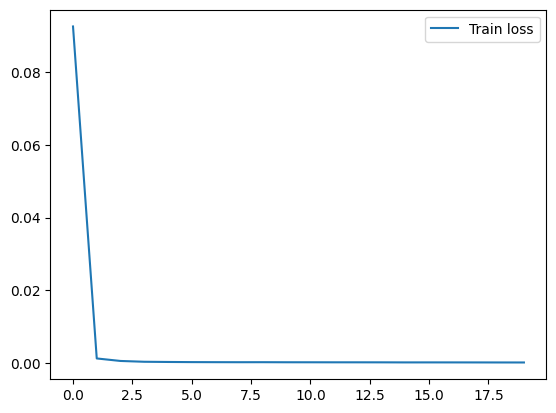

In [14]:
plt.plot(history.history['loss'], label='Train loss')
plt.legend()
plt.show

In [15]:
testPredict = model.predict(X_test)

783/783 [==============================] - 4s 5ms/step


In [16]:
from sklearn.metrics import mean_squared_error,r2_score

testPredict_inv = sc.inverse_transform(testPredict)
y_test_inv = sc.inverse_transform(y_test)

r2_test = r2_score(y_test_inv,testPredict_inv)
rmse_test=np.sqrt(mean_squared_error(y_test_inv,testPredict_inv))

print('R2 Test: {:.3f}'.format(r2_test))
print('RMSE Test: {:.3f}'.format(rmse_test))

R2 Test: 0.981
RMSE Test: 29.581


In [ ]:
plt.figure(figsize=(12-4,3.1))
plt.plot(y_test_inv,lw=1.3,label='Dataset(Test)')
plt.plot(testPredict_inv,'r',lw=2.4,label='Prediction')
plt.legend()
plt.show()

##No.2 : LSTM+CNN

In [36]:
model = tf.keras.Sequential()

#1 LSTM

model.add(LSTM(units=50,return_sequences=True,input_shape=(step,1),activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(units=40,activation='relu',return_sequences=False))



#1.1 CNN LAYER
model.add(tf.keras.layers.Conv1D(filters = 250, kernel_size = 5, padding = 'Same', input_shape=(40,1,1), name = 'conv1d1'))
model.add(tf.keras.layers.BatchNormalization(name = 'batch_norm1'))
model.add(tf.keras.layers.Activation("relu", name = 'relu1'))
model.add(tf.keras.layers.Dropout(0.3, name = 'dropout1'))

#FULLY CONNECTED LAYER
model.add(tf.keras.layers.Flatten(name = 'flatten1'))
model.add(tf.keras.layers.Dense(256, name = 'dense1'))
model.add(tf.keras.layers.BatchNormalization(name = 'batch_norm5'))
model.add(tf.keras.layers.Activation("relu", name = 'relu5'))
model.add(tf.keras.layers.Dropout(0.30, name = 'dropout5'))

#OUTPUT LAYER
model.add(tf.keras.layers.Dense(1, name = 'dense2'))

#COMPILE
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

ValueError: Input 0 of layer "conv1d1" is incompatible with the layer: expected min_ndim=3, found ndim=2. Full shape received: (None, 40)

In [43]:
model = tf.keras.Sequential()

#1 LSTM

model.add(LSTM(units=20,return_sequences=True,input_shape=(step,1)))

#1.1 CNN LAYER
model.add(tf.keras.layers.Conv1D(filters = 32, kernel_size = 3, padding = 'Same',activation='relu'))
model.add(tf.keras.layers.MaxPool1D(pool_size=2))

#FULLY CONNECTED LAYER
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(50))
#OUTPUT LAYER
model.add(tf.keras.layers.Dense(1))

#COMPILE
model.compile(loss='mse',optimizer='adam')
model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_45 (LSTM)              (None, 500, 20)           1760      
                                                                 
 conv1d_11 (Conv1D)          (None, 500, 32)           1952      
                                                                 
 max_pooling1d_10 (MaxPooli  (None, 250, 32)           0         
 ng1D)                                                           
                                                                 
 flatten_5 (Flatten)         (None, 8000)              0         
                                                                 
 dense_6 (Dense)             (None, 50)                400050    
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                     

In [44]:
history =  model.fit(X_train,y_train,epochs=20,batch_size=2048,verbose=1)

Epoch 1/20
113/113 [==============================] - 12s 68ms/step - loss: 0.0865
Epoch 2/20
113/113 [==============================] - 8s 67ms/step - loss: 3.7269e-04
Epoch 3/20
113/113 [==============================] - 8s 69ms/step - loss: 2.7852e-04
Epoch 4/20
113/113 [==============================] - 8s 69ms/step - loss: 2.2899e-04
Epoch 5/20
113/113 [==============================] - 8s 70ms/step - loss: 2.0791e-04
Epoch 6/20
113/113 [==============================] - 8s 69ms/step - loss: 1.9559e-04
Epoch 7/20
113/113 [==============================] - 8s 70ms/step - loss: 1.9377e-04
Epoch 8/20
113/113 [==============================] - 8s 71ms/step - loss: 1.8918e-04
Epoch 9/20
113/113 [==============================] - 8s 71ms/step - loss: 1.7920e-04
Epoch 10/20
113/113 [==============================] - 8s 70ms/step - loss: 1.7755e-04
Epoch 11/20
113/113 [==============================] - 8s 70ms/step - loss: 1.7073e-04
Epoch 12/20
113/113 [==============================] - 

<function matplotlib.pyplot.show(close=None, block=None)>

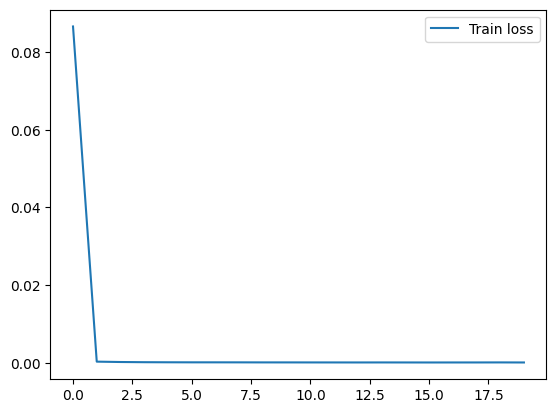

In [45]:
plt.plot(history.history['loss'], label='Train loss')
plt.legend()
plt.show

In [46]:
testPredict = model.predict(X_test)

783/783 [==============================] - 7s 8ms/step


In [47]:
from sklearn.metrics import mean_squared_error,r2_score

testPredict_inv = sc.inverse_transform(testPredict)
y_test_inv = sc.inverse_transform(y_test)

r2_test = r2_score(y_test_inv,testPredict_inv)
rmse_test=np.sqrt(mean_squared_error(y_test_inv,testPredict_inv))

print('R2 Test: {:.3f}'.format(r2_test))
print('RMSE Test: {:.3f}'.format(rmse_test))

R2 Test: 0.990
RMSE Test: 21.369


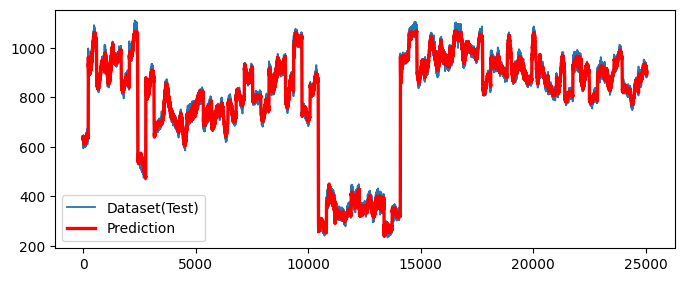

In [48]:
plt.figure(figsize=(12-4,3.1))
plt.plot(y_test_inv,lw=1.3,label='Dataset(Test)')
plt.plot(testPredict_inv,'r',lw=2.4,label='Prediction')
plt.legend()
plt.show()

##No.3 : CNN+GRU



In [ ]:
model = tf.keras.Sequential()

# model.add(LSTM(units=120,return_sequences=False,input_shape=(step,1),activation='relu'))
# model.add(Dropout(0.2))

#1. CNN LAYER
model.add(tf.keras.layers.Conv1D(filters = 250, kernel_size = 5, padding = 'Same', input_shape=(step,1), name = 'conv1d1'))
model.add(tf.keras.layers.BatchNormalization(name = 'batch_norm1'))
model.add(tf.keras.layers.Activation("relu", name = 'relu1'))
model.add(tf.keras.layers.Dropout(0.3, name = 'dropout1'))

#1.1 GRU

model.add(GRU(units=50,return_sequences=True,input_shape=(step,1),activation='relu'))
model.add(Dropout(0.2))
model.add(GRU(units=40,activation='relu'))

# model.add(LSTM(units=40,return_sequences=False,activation='relu'))
# model.add(LSTM(units=120,return_sequences=True,input_shape=(step,1),activation='relu'))
# model.add(Dropout(0.2))
# model.add(LSTM(units=40,activation='relu'))

#FULLY CONNECTED LAYERq
model.add(tf.keras.layers.Flatten(name = 'flatten1'))
model.add(tf.keras.layers.Dense(256, name = 'dense1'))
model.add(tf.keras.layers.BatchNormalization(name = 'batch_norm5'))
model.add(tf.keras.layers.Activation("relu", name = 'relu5'))
model.add(tf.keras.layers.Dropout(0.30, name = 'dropout5'))

#OUTPUT LAYER
model.add(tf.keras.layers.Dense(1, name = 'dense2'))

#COMPILE
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d1 (Conv1D)            (None, 500, 250)          1500      
                                                                 
 batch_norm1 (BatchNormaliz  (None, 500, 250)          1000      
 ation)                                                          
                                                                 
 relu1 (Activation)          (None, 500, 250)          0         
                                                                 
 dropout1 (Dropout)          (None, 500, 250)          0         
                                                                 
 gru_2 (GRU)                 (None, 500, 50)           45300     
                                                                 
 dropout_8 (Dropout)         (None, 500, 50)           0         
                                                      

In [17]:
model = tf.keras.Sequential()

#1.1 CNN LAYER
model.add(tf.keras.layers.Conv1D(filters = 32, kernel_size = 3, padding = 'Same',activation='relu',input_shape=(step,1)))
model.add(tf.keras.layers.MaxPool1D(pool_size=2))

#1 LSTM

model.add(GRU(units=40,return_sequences=True))

#FULLY CONNECTED LAYER
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(50))
#OUTPUT LAYER
model.add(tf.keras.layers.Dense(1))

#COMPILE
model.compile(loss='mse',optimizer='adam')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 500, 32)           128       
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 250, 32)           0         
 g1D)                                                            
                                                                 
 gru (GRU)                   (None, 250, 40)           8880      
                                                                 
 flatten_2 (Flatten)         (None, 10000)             0         
                                                                 
 dense_4 (Dense)             (None, 50)                500050    
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                      

In [18]:
history =  model.fit(X_train,y_train,epochs=20,batch_size=2048,verbose=1)

Epoch 1/20
113/113 [==============================] - 10s 63ms/step - loss: 0.0679
Epoch 2/20
113/113 [==============================] - 7s 64ms/step - loss: 9.9986e-04
Epoch 3/20
113/113 [==============================] - 7s 64ms/step - loss: 4.0794e-04
Epoch 4/20
113/113 [==============================] - 7s 66ms/step - loss: 3.2831e-04
Epoch 5/20
113/113 [==============================] - 8s 68ms/step - loss: 2.7865e-04
Epoch 6/20
113/113 [==============================] - 8s 67ms/step - loss: 2.5851e-04
Epoch 7/20
113/113 [==============================] - 7s 66ms/step - loss: 2.4317e-04
Epoch 8/20
113/113 [==============================] - 7s 66ms/step - loss: 2.2687e-04
Epoch 9/20
113/113 [==============================] - 8s 67ms/step - loss: 2.1281e-04
Epoch 10/20
113/113 [==============================] - 7s 65ms/step - loss: 2.1683e-04
Epoch 11/20
113/113 [==============================] - 7s 65ms/step - loss: 1.9790e-04
Epoch 12/20
113/113 [==============================] - 

<function matplotlib.pyplot.show(close=None, block=None)>

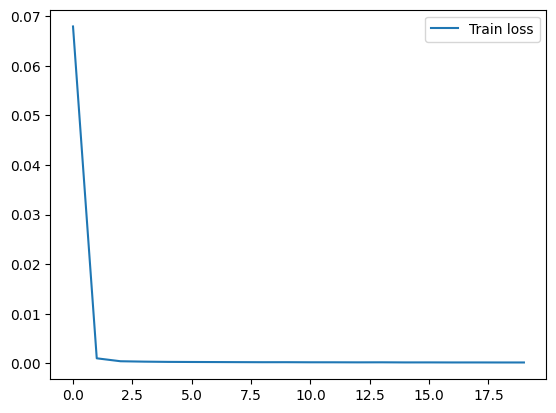

In [19]:
plt.plot(history.history['loss'], label='Train loss')
plt.legend()
plt.show

In [20]:
testPredict = model.predict(X_test)

783/783 [==============================] - 4s 5ms/step


In [21]:
from sklearn.metrics import mean_squared_error,r2_score

testPredict_inv = sc.inverse_transform(testPredict)
y_test_inv = sc.inverse_transform(y_test)

r2_test = r2_score(y_test_inv,testPredict_inv)
rmse_test=np.sqrt(mean_squared_error(y_test_inv,testPredict_inv))

print('R2 Test: {:.3f}'.format(r2_test))
print('RMSE Test: {:.3f}'.format(rmse_test))

R2 Test: 0.989
RMSE Test: 21.906


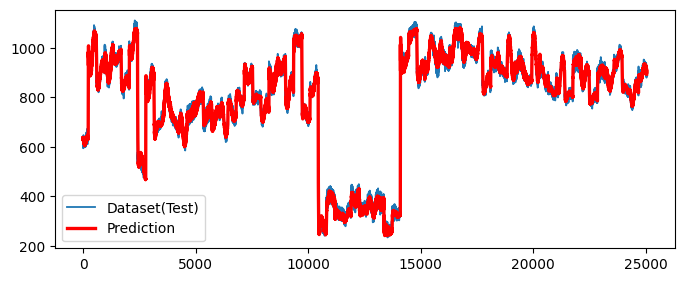

In [22]:
plt.figure(figsize=(12-4,3.1))
plt.plot(y_test_inv,lw=1.3,label='Dataset(Test)')
plt.plot(testPredict_inv,'r',lw=2.4,label='Prediction')
plt.legend()
plt.show()

---------------

##No.4 : GRU+CNN

In [ ]:
model = tf.keras.Sequential()

# model.add(LSTM(units=120,return_sequences=False,input_shape=(step,1),activation='relu'))
# model.add(Dropout(0.2))

#1 GRU

model.add(GRU(units=50,return_sequences=True,input_shape=(step,1),activation='relu'))
model.add(Dropout(0.2))
model.add(GRU(units=40,activation='relu'))

#1.1 CNN LAYER
model.add(tf.keras.layers.Conv1D(filters = 250, kernel_size = 5, padding = 'Same', input_shape=(step,1), name = 'conv1d1'))
model.add(tf.keras.layers.BatchNormalization(name = 'batch_norm1'))
model.add(tf.keras.layers.Activation("relu", name = 'relu1'))
model.add(tf.keras.layers.Dropout(0.3, name = 'dropout1'))

# model.add(LSTM(units=40,return_sequences=False,activation='relu'))
# model.add(LSTM(units=120,return_sequences=True,input_shape=(step,1),activation='relu'))
# model.add(Dropout(0.2))
# model.add(LSTM(units=40,activation='relu'))

#FULLY CONNECTED LAYERq
model.add(tf.keras.layers.Flatten(name = 'flatten1'))
model.add(tf.keras.layers.Dense(256, name = 'dense1'))
model.add(tf.keras.layers.BatchNormalization(name = 'batch_norm5'))
model.add(tf.keras.layers.Activation("relu", name = 'relu5'))
model.add(tf.keras.layers.Dropout(0.30, name = 'dropout5'))

#OUTPUT LAYER
model.add(tf.keras.layers.Dense(1, name = 'dense2'))

#COMPILE
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

#Mai Pan

ValueError: Input 0 of layer "conv1d1" is incompatible with the layer: expected min_ndim=3, found ndim=2. Full shape received: (None, 40)

In [23]:
model = tf.keras.Sequential()

#1 GRU

model.add(GRU(units=20,return_sequences=True,input_shape=(step,1)))

#1.1 CNN LAYER
model.add(tf.keras.layers.Conv1D(filters = 32, kernel_size = 3, padding = 'Same',activation='relu'))
model.add(tf.keras.layers.MaxPool1D(pool_size=2))

#FULLY CONNECTED LAYER
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(50))
#OUTPUT LAYER
model.add(tf.keras.layers.Dense(1))

#COMPILE
model.compile(loss='mse',optimizer='adam')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 500, 20)           1380      
                                                                 
 conv1d_3 (Conv1D)           (None, 500, 32)           1952      
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 250, 32)           0         
 g1D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 8000)              0         
                                                                 
 dense_6 (Dense)             (None, 50)                400050    
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                      

In [24]:
history =  model.fit(X_train,y_train,epochs=20,batch_size=2048,verbose=1)

Epoch 1/20
113/113 [==============================] - 12s 80ms/step - loss: 0.0351
Epoch 2/20
113/113 [==============================] - 9s 77ms/step - loss: 4.6993e-04
Epoch 3/20
113/113 [==============================] - 8s 74ms/step - loss: 2.6582e-04
Epoch 4/20
113/113 [==============================] - 8s 74ms/step - loss: 2.2862e-04
Epoch 5/20
113/113 [==============================] - 8s 73ms/step - loss: 2.1587e-04
Epoch 6/20
113/113 [==============================] - 8s 72ms/step - loss: 2.0124e-04
Epoch 7/20
113/113 [==============================] - 8s 72ms/step - loss: 1.9693e-04
Epoch 8/20
113/113 [==============================] - 9s 77ms/step - loss: 1.9181e-04
Epoch 9/20
113/113 [==============================] - 8s 73ms/step - loss: 1.9609e-04
Epoch 10/20
113/113 [==============================] - 8s 74ms/step - loss: 1.8235e-04
Epoch 11/20
113/113 [==============================] - 8s 72ms/step - loss: 1.8884e-04
Epoch 12/20
113/113 [==============================] - 

<function matplotlib.pyplot.show(close=None, block=None)>

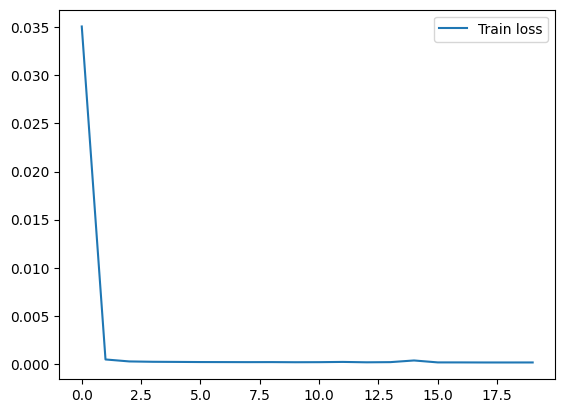

In [25]:
plt.plot(history.history['loss'], label='Train loss')
plt.legend()
plt.show

In [26]:
testPredict = model.predict(X_test)

783/783 [==============================] - 6s 8ms/step


In [27]:
from sklearn.metrics import mean_squared_error,r2_score

testPredict_inv = sc.inverse_transform(testPredict)
y_test_inv = sc.inverse_transform(y_test)

r2_test = r2_score(y_test_inv,testPredict_inv)
rmse_test=np.sqrt(mean_squared_error(y_test_inv,testPredict_inv))

print('R2 Test: {:.3f}'.format(r2_test))
print('RMSE Test: {:.3f}'.format(rmse_test))

R2 Test: 0.992
RMSE Test: 18.989


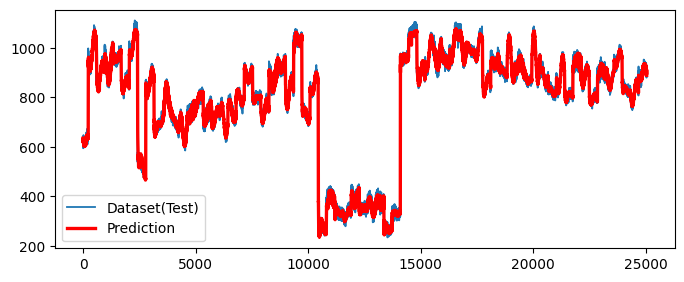

In [28]:
plt.figure(figsize=(12-4,3.1))
plt.plot(y_test_inv,lw=1.3,label='Dataset(Test)')
plt.plot(testPredict_inv,'r',lw=2.4,label='Prediction')
plt.legend()
plt.show()